[boston 데이터셋을 활용한 집값 예측]
- 데이터셋: boston.csv
- 구현 프레임워크: Pytorch

[1] 모듈 로딩 및 데이터 준비    

In [327]:
#모듈 로딩
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optimizer
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [328]:
#데이터 로딩
data_file='../data/boston.csv'
bostonDF=pd.read_csv(data_file)
bostonDF.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


[2] 모델 준비
- 학습 방법: 지도학습 중 회귀
- 알고리즘: 선형모델(nn.Linear)

In [329]:
model=nn.Linear(13,1)

In [330]:
for name,param in model.named_parameters():
    print(f'[{name}] {param} \n')

[weight] Parameter containing:
tensor([[ 0.2409, -0.0810,  0.1040,  0.0819,  0.1446,  0.1404,  0.1097,  0.1031,
          0.2749, -0.2675,  0.0296, -0.1317, -0.1587]], requires_grad=True) 

[bias] Parameter containing:
tensor([-0.1912], requires_grad=True) 



[3] 최적화 인스턴스 준비

In [331]:
adam_optim=optimizer.Adam(model.parameters(),lr=0.085)

[4] 학습

In [332]:
featureTS=torch.from_numpy(bostonDF[bostonDF.columns[:-1]].values).float()
featureTS.shape

torch.Size([506, 13])

In [333]:
targetTS=torch.from_numpy(bostonDF[['MEDV']].values).float()
targetTS.shape

torch.Size([506, 1])

In [334]:
x_train,x_test,y_train,y_test=train_test_split(featureTS,targetTS,test_size=0.2)

x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2)

print(f'[FEATURE] TRAIN {x_train.shape}, TEST {x_test.shape} VALIDATE {x_val.shape}')
print(f'[TARGET] TRAIN {y_train.shape}, TEST {y_test.shape} VALIDATE {y_val.shape}')

[FEATURE] TRAIN torch.Size([323, 13]), TEST torch.Size([102, 13]) VALIDATE torch.Size([81, 13])
[TARGET] TRAIN torch.Size([323, 1]), TEST torch.Size([102, 1]) VALIDATE torch.Size([81, 1])


In [335]:
EPOCH=50

In [336]:
def testing(testTS,targetTS,kind='val'):
    with torch.no_grad():
        pre_y=model(testTS)

        loss=F.mse_loss(pre_y,targetTS)

        print('f[{kind}] LOSS: {loss}')

    return loss

In [337]:
def training(featureTS,targetTS,valTS,val_target_TS):
    loss_history=[[],[]]

    for epoch in range(EPOCH):
        pre_y=model(featureTS)

        loss=F.mse_loss(pre_y,targetTS)
        loss_history[0].append(loss.item())

        adam_optim.zero_grad()
        loss.backward()
        adam_optim.step()

        val_loss=testing(valTS,val_target_TS)
        loss_history[1].append(val_loss.item())

        print(f'[{epoch}/{EPOCH}] LOSS: {loss}')

    return loss_history

In [338]:
loss=training(x_train,y_train,x_val,y_val)

f[{kind}] LOSS: {loss}
[0/50] LOSS: 29128.3125
f[{kind}] LOSS: {loss}
[1/50] LOSS: 8510.9765625
f[{kind}] LOSS: {loss}
[2/50] LOSS: 441.78338623046875
f[{kind}] LOSS: {loss}
[3/50] LOSS: 2118.304931640625
f[{kind}] LOSS: {loss}
[4/50] LOSS: 7098.3466796875
f[{kind}] LOSS: {loss}
[5/50] LOSS: 9576.982421875
f[{kind}] LOSS: {loss}
[6/50] LOSS: 8424.314453125
f[{kind}] LOSS: {loss}
[7/50] LOSS: 5276.8837890625
f[{kind}] LOSS: {loss}
[8/50] LOSS: 2128.05029296875
f[{kind}] LOSS: {loss}
[9/50] LOSS: 342.7642517089844
f[{kind}] LOSS: {loss}
[10/50] LOSS: 335.4668884277344
f[{kind}] LOSS: {loss}
[11/50] LOSS: 1586.2392578125
f[{kind}] LOSS: {loss}
[12/50] LOSS: 3045.219482421875
f[{kind}] LOSS: {loss}
[13/50] LOSS: 3792.318603515625
f[{kind}] LOSS: {loss}
[14/50] LOSS: 3501.109619140625
f[{kind}] LOSS: {loss}
[15/50] LOSS: 2444.802734375
f[{kind}] LOSS: {loss}
[16/50] LOSS: 1204.561767578125
f[{kind}] LOSS: {loss}
[17/50] LOSS: 335.16400146484375
f[{kind}] LOSS: {loss}
[18/50] LOSS: 124.23567

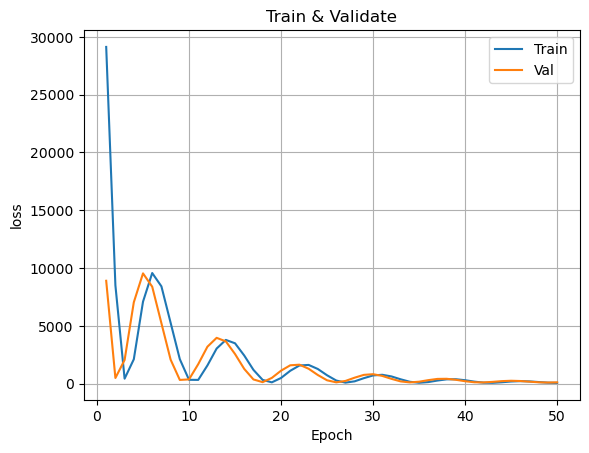

In [339]:
plt.plot(range(1,51),loss[0],label='Train')
plt.plot(range(1,51),loss[1],label='Val')
plt.title('Train & Validate')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.show()